In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Stud.csv')

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
print("Categories in 'gender' variable:    ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ", end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [11]:
# defining numerical and categorical features
numeric_features=[features for features in df.columns if df[features].dtype != 'O']
print(f"There are {len(numeric_features)} numerical features = {numeric_features} ")

categorical_features=[features for features in df.columns if df[features].dtype == 'O']
print("There are {} categorical features = {}".format(len(categorical_features),categorical_features))

There are 3 numerical features = ['math score', 'reading score', 'writing score'] 
There are 5 categorical features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [14]:
math_full = df[df['math score']== 100]['math score'].count()
reading_full = df[df['reading score']== 100]['reading score'].count()
writing_score = df[df['writing score']== 100]['writing score'].count()

print(f"Number of students with full marks in maths = {math_full}")
print(f"Number of students with full marks in reading = {reading_full}")
print(f"Number of students with full marks in writting = {writing_score}")

Number of students with full marks in maths = 7
Number of students with full marks in reading = 17
Number of students with full marks in writting = 14


In [15]:
math_less_20 = df[df['math score'] <= 20]['math score'].count()
reading_less_20 = df[df['reading score'] <= 20]['reading score'].count()
writing_less_20 = df[df['writing score'] <= 20]['writing score'].count()

print(f"Number of students with less than 20 marks in maths = {math_less_20}")
print(f"Number of students with less than 20 marks in reading = {reading_less_20}")
print(f"Number of students with less than 20 marks in writting = {writing_less_20}")

Number of students with less than 20 marks in maths = 4
Number of students with less than 20 marks in reading = 1
Number of students with less than 20 marks in writting = 3


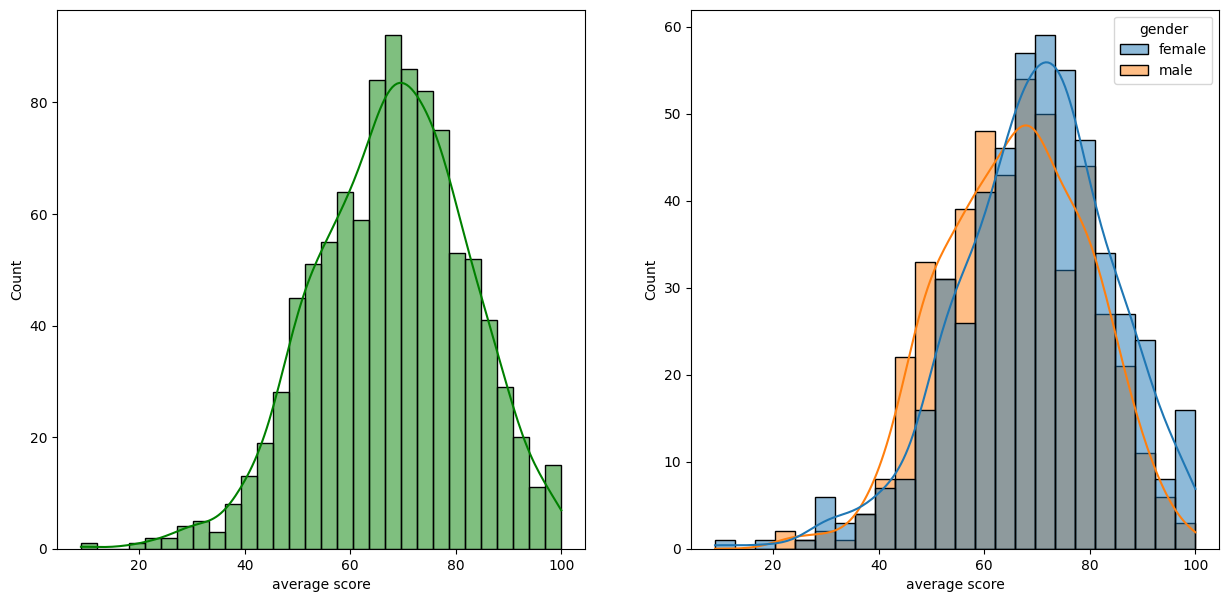

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

<Axes: xlabel='total score', ylabel='Count'>

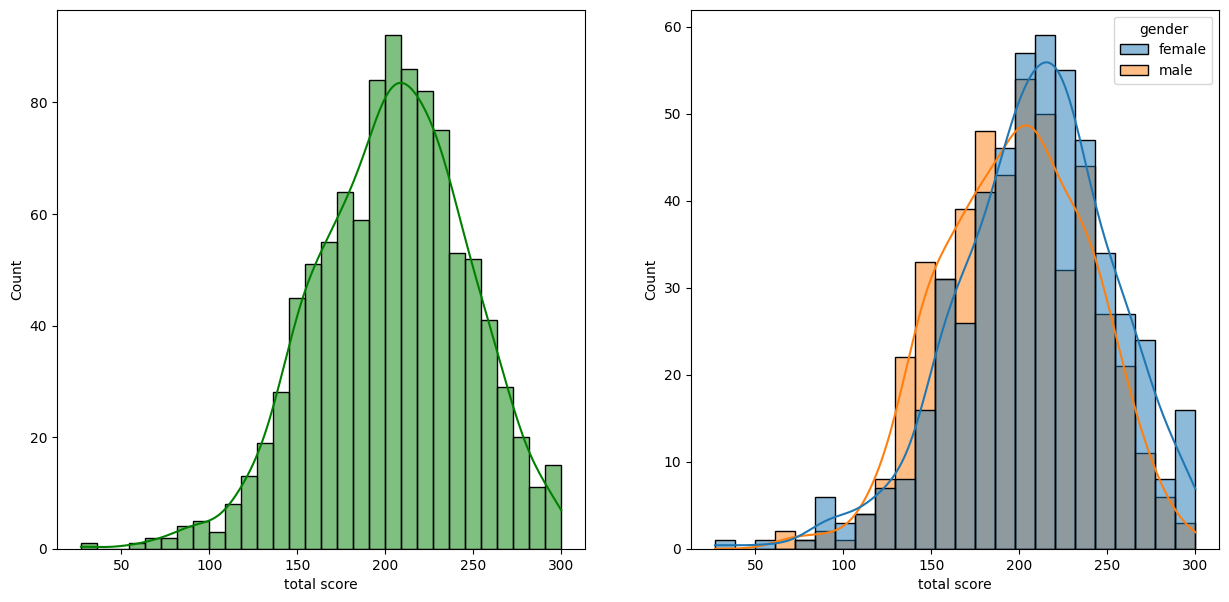

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="total score",kde=True,bins=30,color="green")
plt.subplot(122)
sns.histplot(data=df,x="total score",kde=True,hue="gender")

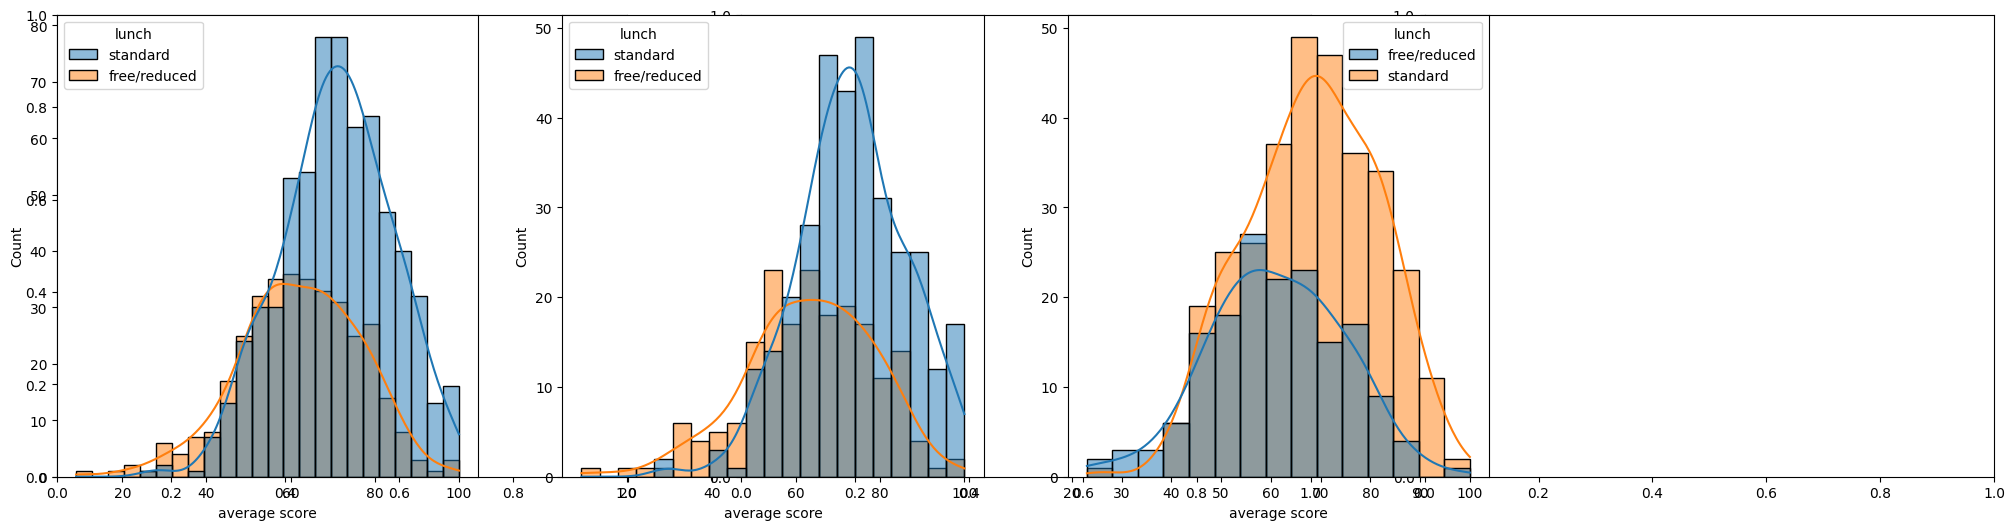

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

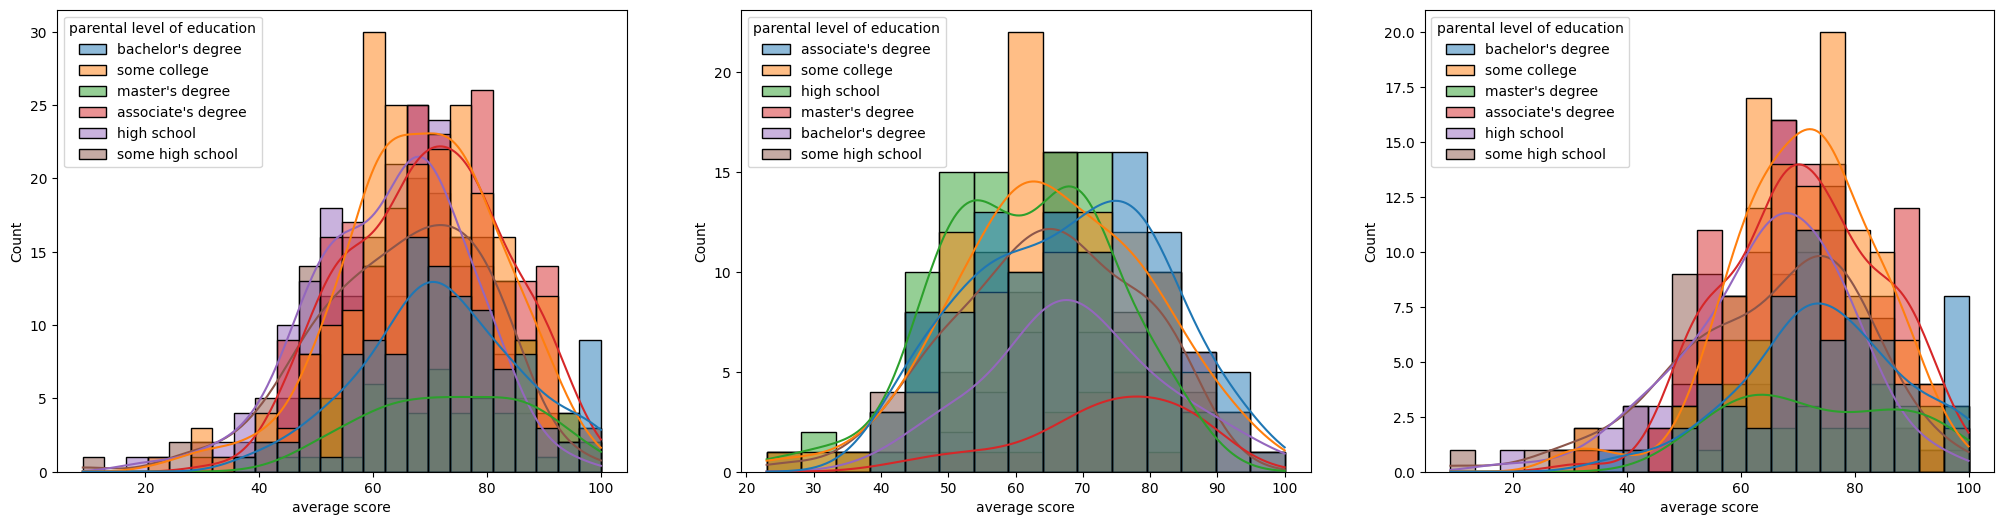

In [19]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average score",hue="parental level of education",kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=="male"],x="average score",hue="parental level of education",kde=True)
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.show()

In [20]:
df.head(5
        )

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


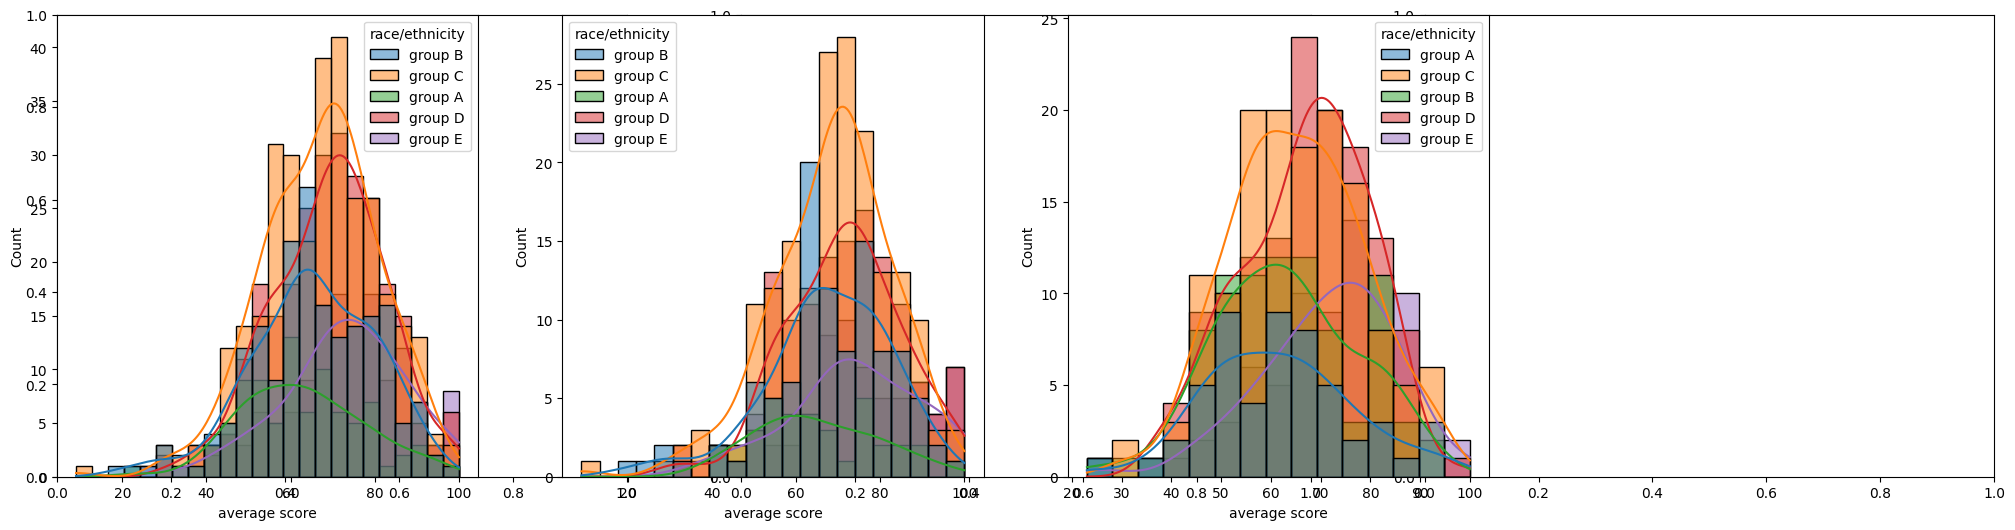

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()

<Axes: title={'center': 'Writing Score'}, ylabel='writing score'>

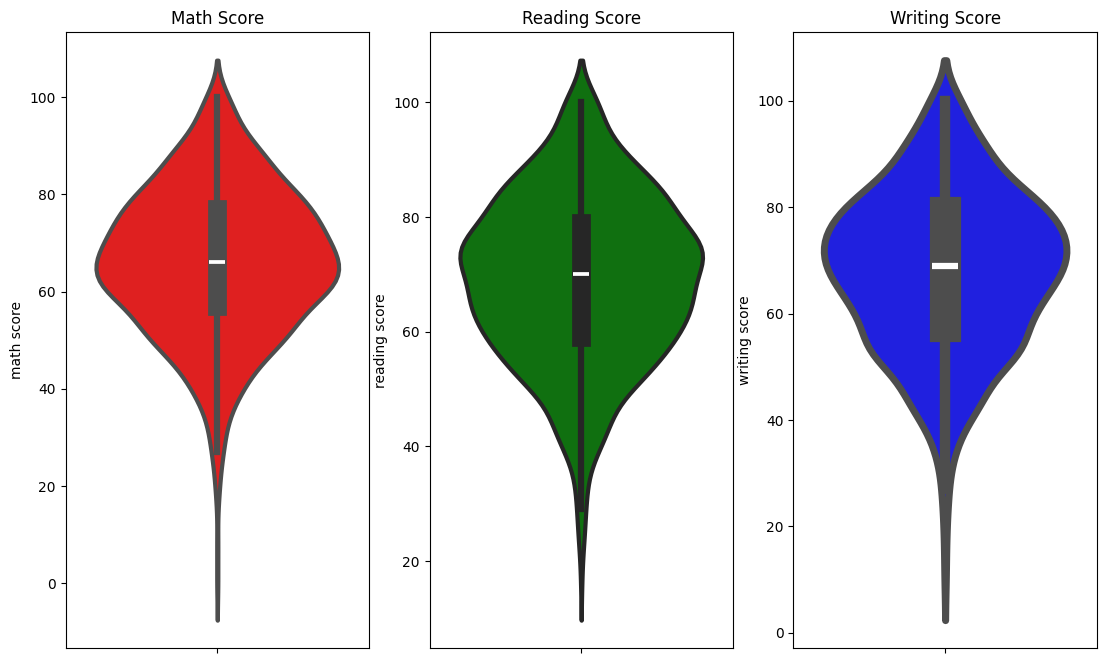

In [22]:
plt.figure(figsize=(18,8))

plt.subplot(141)
plt.title('Math Score')
sns.violinplot(data=df,y="math score",color="red",linewidth=3)

plt.subplot(142)
plt.title('Reading Score')
sns.violinplot(data=df,color="green",y="reading score",linewidth=3)
plt.subplot(143)
plt.title('Writing Score')
sns.violinplot(data=df,color="blue",y="writing score",linewidth=5)

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

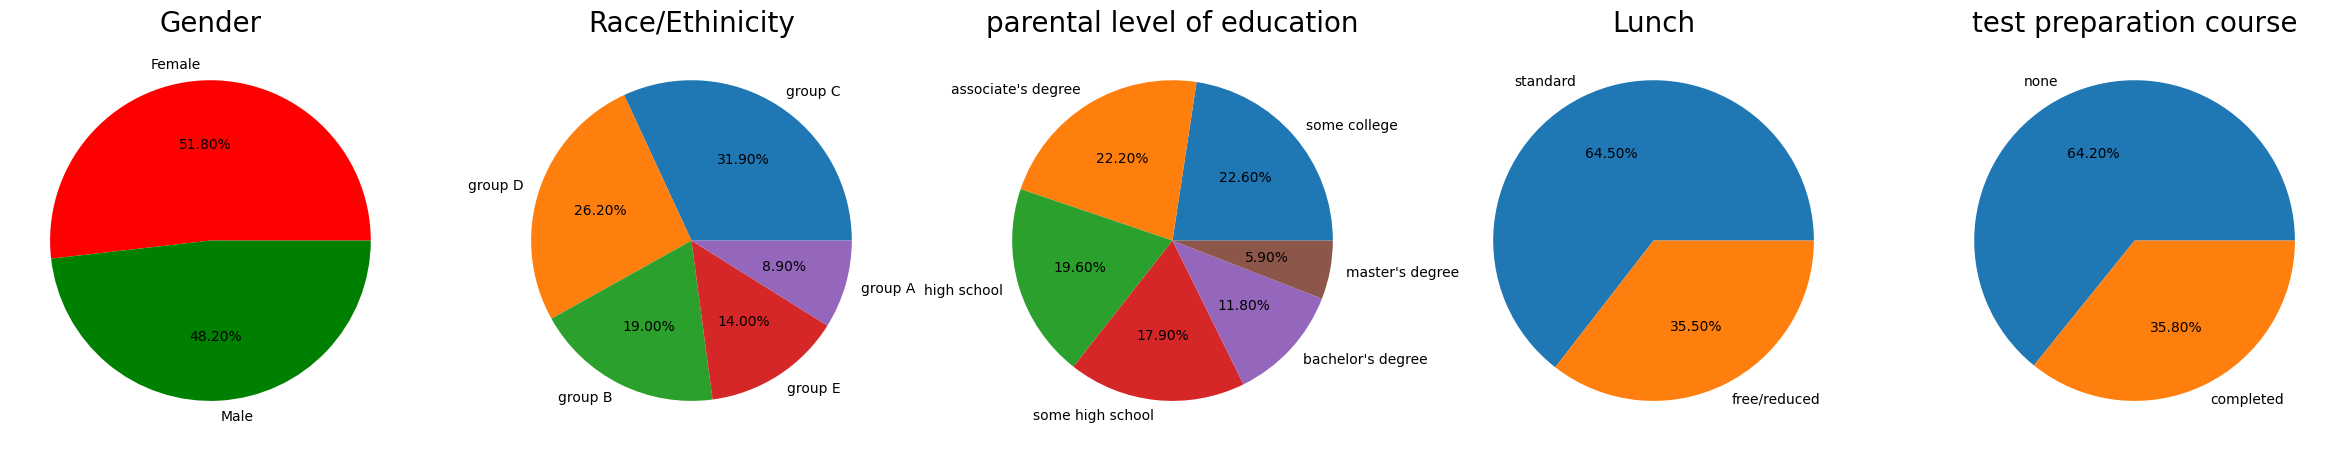

In [23]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(151)
size=df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(152)
size=df['race/ethnicity'].value_counts()
labels = size.index
plt.pie(size,labels=labels,autopct = '%.2f%%')
plt.title('Race/Ethinicity', fontsize = 20)
plt.axis('off')

plt.subplot(153)
size=df['parental level of education'].value_counts()
labels=size.index
plt.pie(size,labels=labels,autopct = '%.2f%%')
plt.title('parental level of education', fontsize = 20)
plt.axis('off')

plt.subplot(154)
size = df['lunch'].value_counts()
labels=size.index
plt.pie(size,labels=labels,autopct='%.2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(155)
size = df['test preparation course'].value_counts()
labels = size.index
plt.pie(size,labels=labels,autopct='%.2f%%')
plt.title('test preparation course',fontsize=20)
plt.axis('off')

In [24]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


([<matplotlib.patches.Wedge at 0x166faea9510>,
 [Text(-0.062170487413935493, 1.0982416994881927, 'female'),
  Text(0.06782216900078375, -1.1980818642279956, 'male')],
 [Text(-0.03391117495305572, 0.5990409269935596, '51.8%'),
  Text(0.039562931917123845, -0.6988810874663307, '48.2%')])

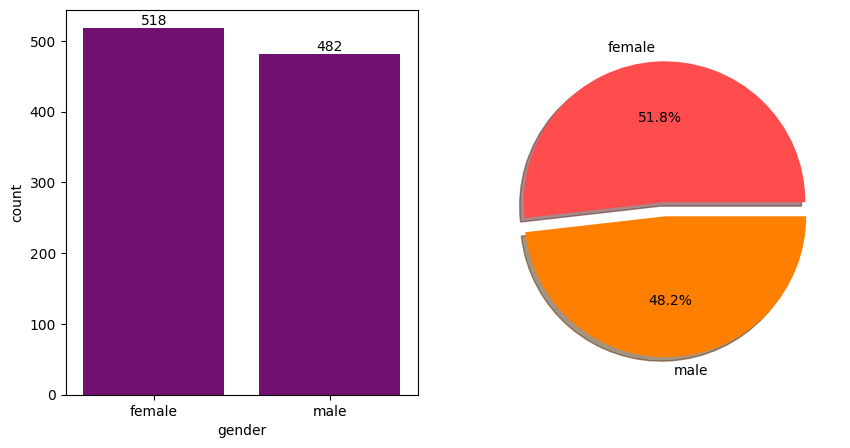

In [25]:
f,ax= plt.subplots(1,2,figsize=(10,5))

sns.countplot(data=df,x=df['gender'],ax=ax[0],color='purple')
for container in ax[0].containers:
    ax[0].bar_label(container)

x=df['gender'].value_counts()
labels=x.index
ax[1].pie(x,labels=labels,explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

In [34]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


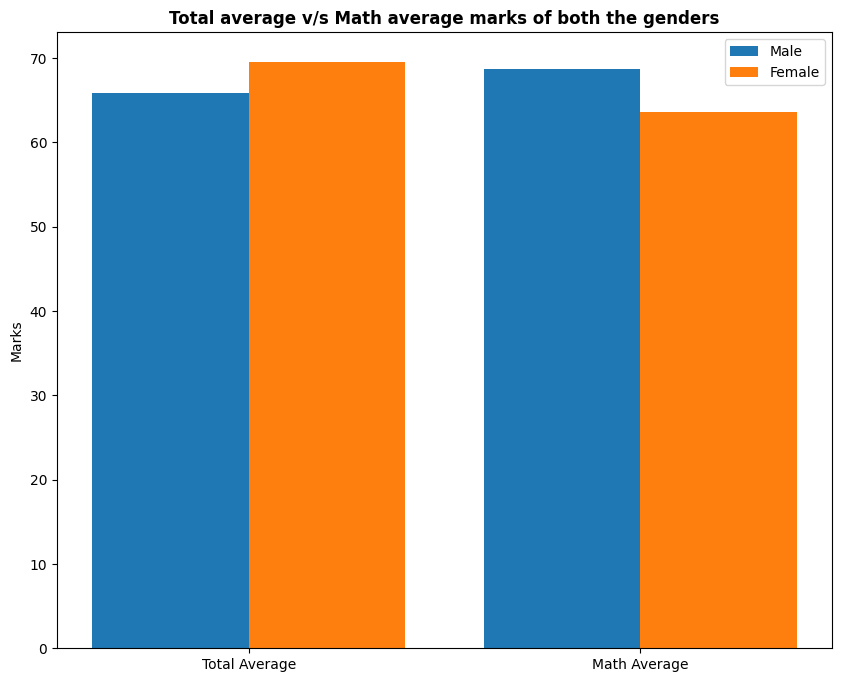

In [35]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend() 
plt.show()

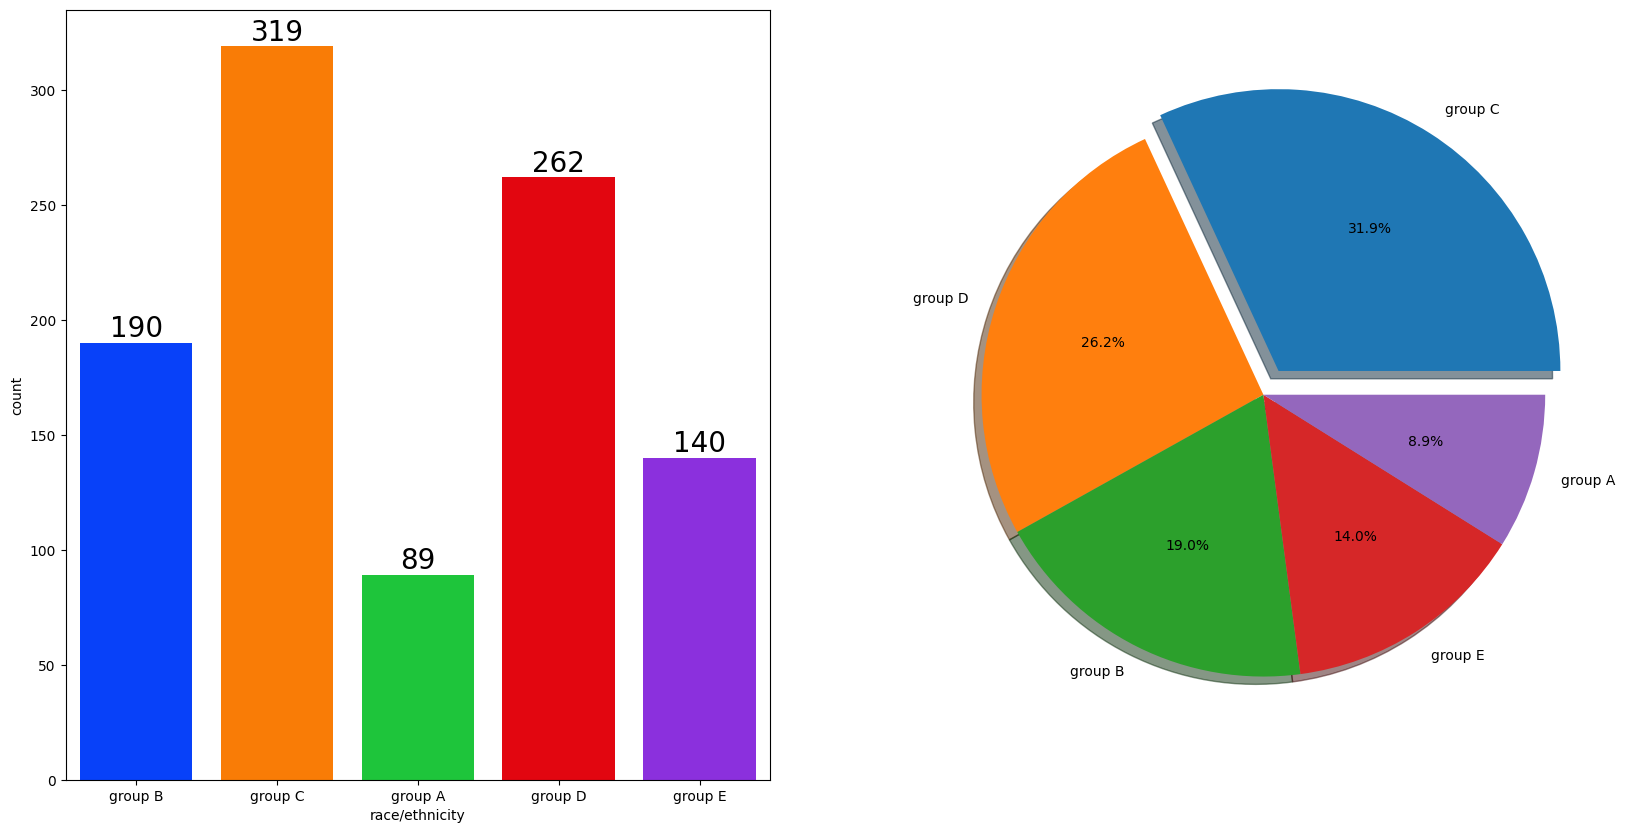

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()    